# This notebook trains regression artificial neural networks (ANNs) to predict each of the fall parameters. We also plot the loss over the training epochs.

In [3]:
from CNN import *
from sklearn.preprocessing import StandardScaler

all_labels = ['height', 'phi', 'theta', 
        'impact site x', 'impact site y', 'impact site z', 
        'impact site r', 'impact site phi', 'impact site theta']

'''the dataset we are useing's path'''
# full_dataset_pathname = "/Volumes/Jake_ssd/Paper_1_results_WITH_feature_engineering/dataset/feature_transformations_2023-11-16/height/HEIGHTALL_TRANSFORMED_FEATURES.csv"
full_dataset_pathname = "/Volumes/Jake_ssd/Paper 1/Paper_1_results_no_feature_engineering/dataset/New_Crack_Len_FULL_OG_dataframe_2023_11_16.csv"
full_df = pd.read_csv(full_dataset_pathname, index_col=0)

'''where the results are stored'''
# results_folder = '/Volumes/Jake_ssd/Paper_1_results_no_feature_engineering/results'
results_folder = '/Volumes/Jake_ssd/Paper1/Paper_1_results_WITH_feature_engineering/results'




Now we need to normalize all of the features to prep for training the ANN

In [4]:
label_df = full_df[all_labels]
feature_df = full_df.drop(all_labels, axis=1)

'''removing all ofthe columns that contain 'timestep_init' in their name'''
feature_df = feature_df[feature_df.columns[~feature_df.columns.str.contains('timestep_init')]]

'''normalizing all of the features'''
scaler = StandardScaler()
feature_df = pd.DataFrame(scaler.fit_transform(feature_df), columns=feature_df.columns)
print(feature_df.head)


<bound method NDFrame.head of        init z    init y    init x  max_prop_speed  avg_prop_speed  \
0    0.619491  0.175101  0.402692       -0.737205       -0.045075   
1    0.515350 -1.111787 -0.215114       -0.757941       -0.084572   
2   -4.670302 -3.096005  1.451425       -0.939100       -0.429644   
3    0.619491  0.175101  0.402692       -0.836577       -0.234358   
4   -1.305640  0.520393 -2.108091       -0.843549       -0.415103   
..        ...       ...       ...             ...             ...   
296  0.692959 -0.171864  0.016645       -0.742823       -0.055775   
297 -0.992889  0.014289 -2.045863       -0.853230       -0.266078   
298 -1.683001  0.945936  1.926601        0.187816       -0.354742   
299 -1.305640  0.520393 -2.108091       -0.454911       -0.371802   
300  0.619491  0.175101  0.402692        0.385332       -0.086512   

     dist btw frts  crack len  linearity  max thickness  mean thickness  ...  \
0        -0.836302  -0.805450   0.014716       0.417260      

In [5]:
# label_predicted = 'impact site x'
label_predicted = 'impact site y'
# label_predicted = 'height'

kf = KFold(n_splits=5, shuffle=True)

kfold_models = []
kfold_histories = []
fold_no = 0

all_train_feats = []
all_train_labels = []
all_val_feats = []
all_val_labels = []
#Splitting the data into folds
for train_index, val_index in kf.split(feature_df):
    fold_no +=1
    print(f'TRAINING FOLD {fold_no}')
    
    train_df = feature_df.iloc[train_index]
    val_df = feature_df.iloc[val_index]
    train_labels = label_df.iloc[train_index]
    val_labels = label_df.iloc[val_index]
    
    model, history = make_1D_CNN_for_ensemble(train_df, 
                                     val_df, 
                                     train_labels[label_predicted], 
                                     val_labels[label_predicted], 
                                     patience=200, 
                                     max_epochs=10, 
                                     num_outputs=1, 
                                     lossfunc='mean_squared_error',#mean_absolute_error for height
                                     verbose=True,
                                     L1=0.1, #0.01 for height
                                     L2=0.01, #0.01 for height
                                     dropout=0.2) #0.2 for height
    kfold_models.append(model)
    kfold_histories.append(history)
    all_train_feats.append(train_df)
    all_train_labels.append(train_labels)
    all_val_feats.append(val_df)
    all_val_labels.append(val_labels)

TRAINING FOLD 1
Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2024-08-20 16:28:05.747249: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-20 16:28:05.748278: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-08-20 16:28:05.864913: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-08-20 16:28:05.962961: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-08-20 16:28:05.985003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2024-08-20 16:28:07.890881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 444.8374

2024-08-20 16:28:11.850223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 5s 161ms/step - loss: 444.8374 - val_loss: 455.7502
Epoch 2/10
8/8 [==============================] - 0s 15ms/step - loss: 418.4833 - val_loss: 449.6472
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 402.5840 - val_loss: 442.8398
Epoch 4/10
8/8 [==============================] - 0s 16ms/step - loss: 385.1316 - val_loss: 435.9051
Epoch 5/10
8/8 [==============================] - 0s 15ms/step - loss: 367.8889 - val_loss: 429.7604
Epoch 6/10
8/8 [==============================] - 0s 15ms/step - loss: 352.8625 - val_loss: 423.0175
Epoch 7/10
8/8 [==============================] - 0s 14ms/step - loss: 349.1839 - val_loss: 415.8647
Epoch 8/10
8/8 [==============================] - 0s 14ms/step - loss: 325.6451 - val_loss: 408.3260
Epoch 9/10
8/8 [==============================] - 0s 14ms/step - loss: 319.2568 - val_loss: 400.7518
Epoch 10/10
8/8 [==============================] - 0s 14ms/step - loss: 312.4451 - val_loss: 393.3700

2024-08-20 16:28:13.588103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-08-20 16:28:13.607469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2024-08-20 16:28:14.354115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 428.5623

2024-08-20 16:28:16.112155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 3s 173ms/step - loss: 428.5623 - val_loss: 476.2675
Epoch 2/10
8/8 [==============================] - 0s 16ms/step - loss: 409.3601 - val_loss: 467.2954
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 392.3061 - val_loss: 459.1396
Epoch 4/10
8/8 [==============================] - 0s 14ms/step - loss: 368.1088 - val_loss: 451.3946
Epoch 5/10
8/8 [==============================] - 0s 14ms/step - loss: 358.2639 - val_loss: 442.5372
Epoch 6/10
8/8 [==============================] - 0s 15ms/step - loss: 344.9592 - val_loss: 431.9506
Epoch 7/10
8/8 [==============================] - 0s 15ms/step - loss: 333.2791 - val_loss: 422.0829
Epoch 8/10
8/8 [==============================] - 0s 17ms/step - loss: 319.7346 - val_loss: 409.6832
Epoch 9/10
8/8 [==============================] - 0s 14ms/step - loss: 307.2174 - val_loss: 399.2699
Epoch 10/10
8/8 [==============================] - 0s 14ms/step - loss: 303.9124 - val_loss: 389.4292

2024-08-20 16:28:17.493642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-08-20 16:28:17.512398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-08-20 16:28:18.078908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 463.9633

2024-08-20 16:28:19.660327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 2s 129ms/step - loss: 463.9633 - val_loss: 344.6845
Epoch 2/10
8/8 [==============================] - 0s 16ms/step - loss: 443.6110 - val_loss: 338.4250
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 421.2901 - val_loss: 332.0175
Epoch 4/10
8/8 [==============================] - 0s 15ms/step - loss: 405.2479 - val_loss: 325.0490
Epoch 5/10
8/8 [==============================] - 0s 15ms/step - loss: 385.0874 - val_loss: 317.4844
Epoch 6/10
8/8 [==============================] - 0s 15ms/step - loss: 365.6046 - val_loss: 309.8488
Epoch 7/10
8/8 [==============================] - 0s 14ms/step - loss: 359.9767 - val_loss: 302.4775
Epoch 8/10
8/8 [==============================] - 0s 14ms/step - loss: 343.7633 - val_loss: 294.6479
Epoch 9/10
8/8 [==============================] - 0s 14ms/step - loss: 338.1630 - val_loss: 286.5914
Epoch 10/10
8/8 [==============================] - 0s 14ms/step - loss: 323.8139 - val_loss: 278.2883

2024-08-20 16:28:21.055035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-08-20 16:28:21.073657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-08-20 16:28:21.638708: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 427.1565

2024-08-20 16:28:23.223974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 2s 135ms/step - loss: 427.1565 - val_loss: 505.0946
Epoch 2/10
8/8 [==============================] - 0s 17ms/step - loss: 393.9938 - val_loss: 498.6432
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 382.0966 - val_loss: 492.2264
Epoch 4/10
8/8 [==============================] - 0s 15ms/step - loss: 360.0515 - val_loss: 485.4403
Epoch 5/10
8/8 [==============================] - 0s 16ms/step - loss: 347.7955 - val_loss: 478.4433
Epoch 6/10
8/8 [==============================] - 0s 15ms/step - loss: 330.7719 - val_loss: 470.4080
Epoch 7/10
8/8 [==============================] - 0s 15ms/step - loss: 317.9116 - val_loss: 461.7262
Epoch 8/10
8/8 [==============================] - 0s 14ms/step - loss: 304.7240 - val_loss: 452.5143
Epoch 9/10
8/8 [==============================] - 0s 15ms/step - loss: 290.4092 - val_loss: 442.8760
Epoch 10/10
8/8 [==============================] - 0s 14ms/step - loss: 283.0243 - val_loss: 432.2926

2024-08-20 16:28:24.700371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2024-08-20 16:28:24.719587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10


2024-08-20 16:28:25.413301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - ETA: 0s - loss: 449.6039

2024-08-20 16:28:27.619879: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 3s 181ms/step - loss: 449.6039 - val_loss: 405.5500
Epoch 2/10
8/8 [==============================] - 0s 17ms/step - loss: 423.7395 - val_loss: 399.2468
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 404.7992 - val_loss: 392.8525
Epoch 4/10
8/8 [==============================] - 0s 15ms/step - loss: 391.1472 - val_loss: 385.8518
Epoch 5/10
8/8 [==============================] - 0s 15ms/step - loss: 373.9571 - val_loss: 378.4149
Epoch 6/10
8/8 [==============================] - 0s 14ms/step - loss: 362.4938 - val_loss: 370.1739
Epoch 7/10
8/8 [==============================] - 0s 15ms/step - loss: 349.4484 - val_loss: 360.7102
Epoch 8/10
8/8 [==============================] - 0s 15ms/step - loss: 331.2052 - val_loss: 350.7522
Epoch 9/10
8/8 [==============================] - 0s 15ms/step - loss: 314.2972 - val_loss: 340.5238
Epoch 10/10
8/8 [==============================] - 0s 14ms/step - loss: 306.9166 - val_loss: 330.9650

1/2 [==============>...............] - ETA: 0s

2024-08-20 16:28:34.111294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 11ms/step


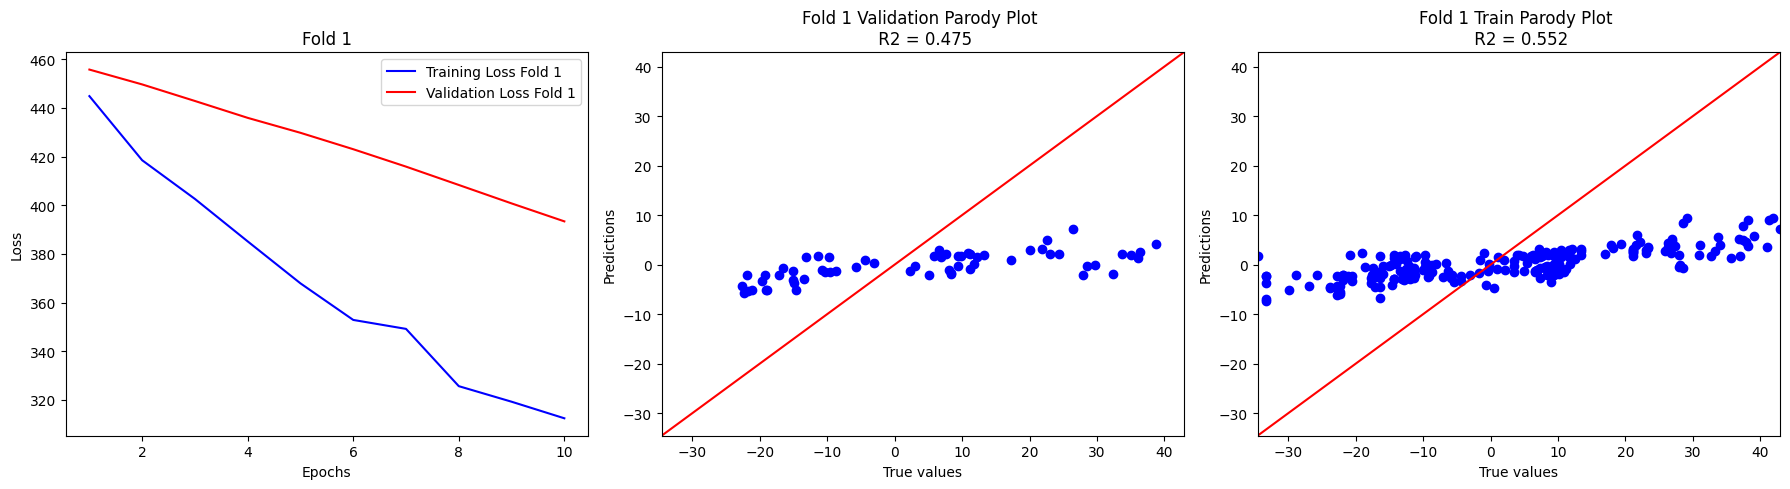

1/2 [==============>...............] - ETA: 0s

2024-08-20 16:28:34.847861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 16ms/step


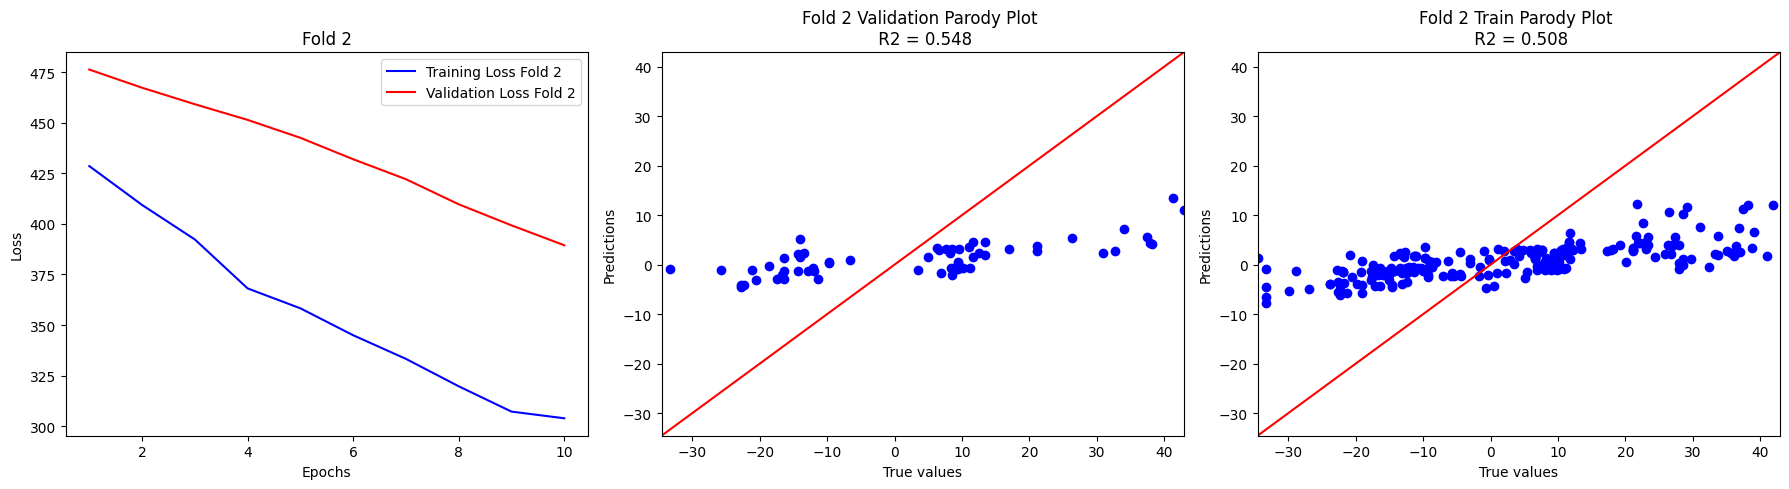

2/2 [==============================] - 0s 56ms/step


2024-08-20 16:28:35.605980: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 10ms/step


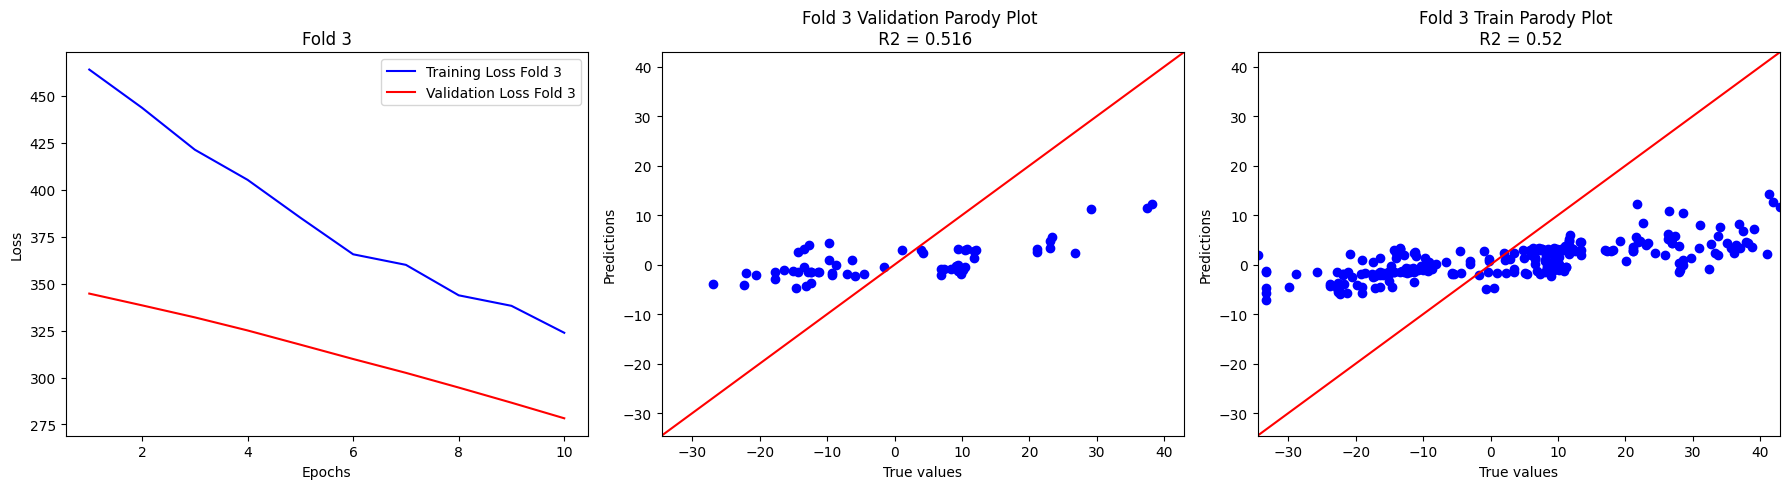

1/2 [==============>...............] - ETA: 0s

2024-08-20 16:28:36.256335: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 12ms/step


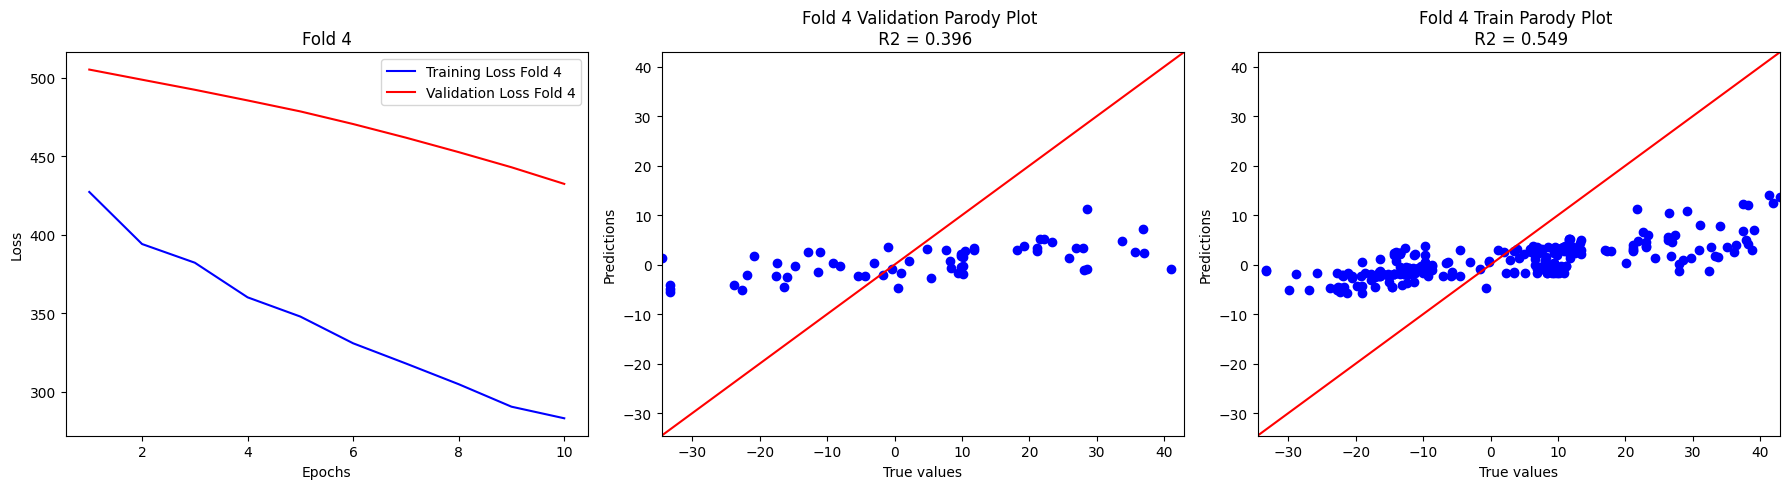

1/2 [==============>...............] - ETA: 0s

2024-08-20 16:28:36.987764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 13ms/step


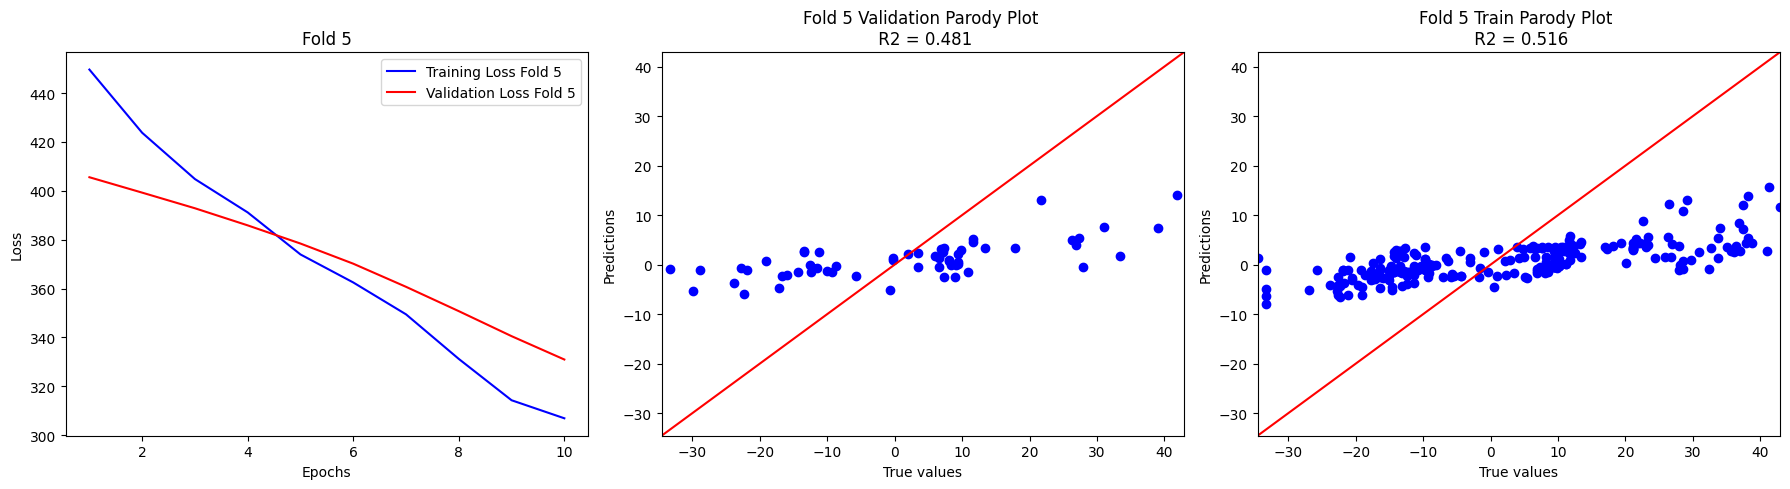

In [6]:
'''Now we are plotting the learning curves, test and training parody plots for each fold in our 5 fold cross validation'''
for i, history in enumerate(kfold_histories):
    plt.figure(figsize=(18, 5))

    '''Training Loss Plot'''
    plt.subplot(1, 3, 1)
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    epochs = range(1, len(training_loss) + 1)
    plt.plot(epochs, training_loss, 'b', label=f'Training Loss Fold {i+1}')
    plt.plot(epochs, validation_loss, 'r', label=f'Validation Loss Fold {i+1}')
    plt.title(f'Fold {i+1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()


    '''Parody plot (test examples)'''
    plt.subplot(1, 3, 2)
    model = kfold_models[i]
    val_feats = all_val_feats[i]
    val_labels = all_val_labels[i]

    val_preds = model.predict(val_feats)
    plt.scatter(val_labels[label_predicted], val_preds, c='b')
    x_min = label_df[label_predicted].min()
    x_max = label_df[label_predicted].max()
    
    #Create parody line (red)
    x = np.linspace(x_min, x_max, 100)
    y = x  # y = x because the slope is 1
    plt.plot(x, y, 3, c='r')
    
    #Calculate R^2 and put it in the title
    r_squared = r2_score(val_preds[:,0], val_labels[label_predicted])
    corr_coefficient, p_value = pearsonr(val_preds[:,0], val_labels[label_predicted])
    r_squared = corr_coefficient ** 2
    plt.title(f'Fold {i+1} Validation Parody Plot \n R2 = {np.round(r_squared, 3)}')
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.xlim((x_min,x_max))
    plt.ylim((x_min,x_max))
    
    
    '''Parody Plot (Train Examples)'''
    plt.subplot(1, 3, 3)
    model = kfold_models[i]
    train_feats = all_train_feats[i]
    train_labels = all_train_labels[i]

    train_preds = model.predict(train_feats)
    plt.scatter(train_labels[label_predicted], train_preds, c='b')
    x_min = label_df[label_predicted].min()
    x_max = label_df[label_predicted].max()
    
    #Create parody line (red)
    x = np.linspace(x_min, x_max, 100)
    y = x  # y = x because the slope is 1
    plt.plot(x, y, 3, c='r')

    #Calculate R^2 value and put it into the title    
    r_squared = r2_score(train_preds[:,0], train_labels[label_predicted])
    corr_coefficient, p_value = pearsonr(train_preds[:,0], train_labels[label_predicted])
    r_squared = corr_coefficient ** 2
    plt.title(f'Fold {i+1} Train Parody Plot \n R2 = {np.round(r_squared, 3)}')
    plt.xlabel('True values')
    plt.ylabel('Predictions')
    plt.xlim((x_min,x_max))
    plt.ylim((x_min,x_max))

    plt.tight_layout()
    plt.show()
